In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [70]:
df = pd.read_csv("https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv")
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [71]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [72]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [74]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [75]:
y =df['target']
X =df.drop(['target'], axis = 1)
X.head()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

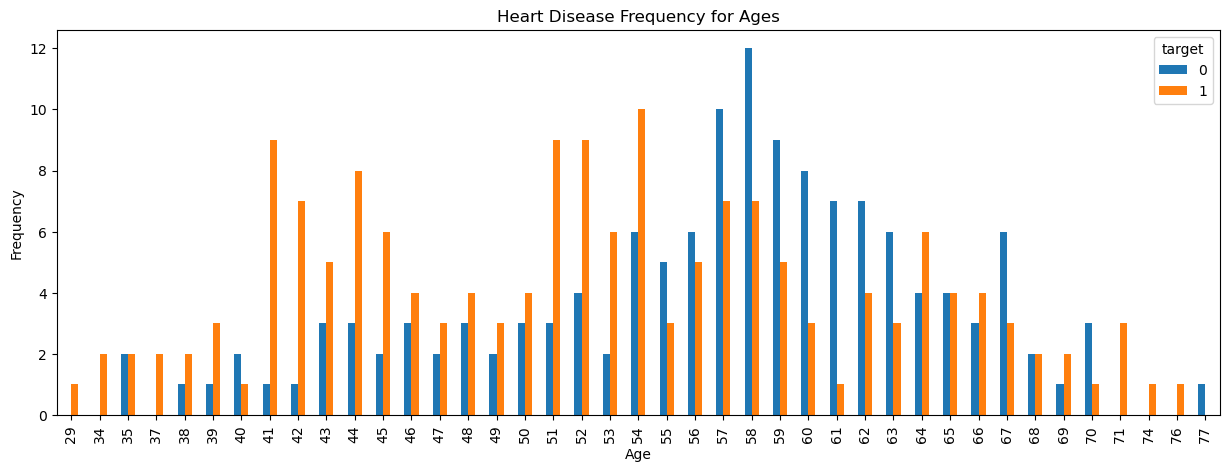

In [78]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(15,5))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

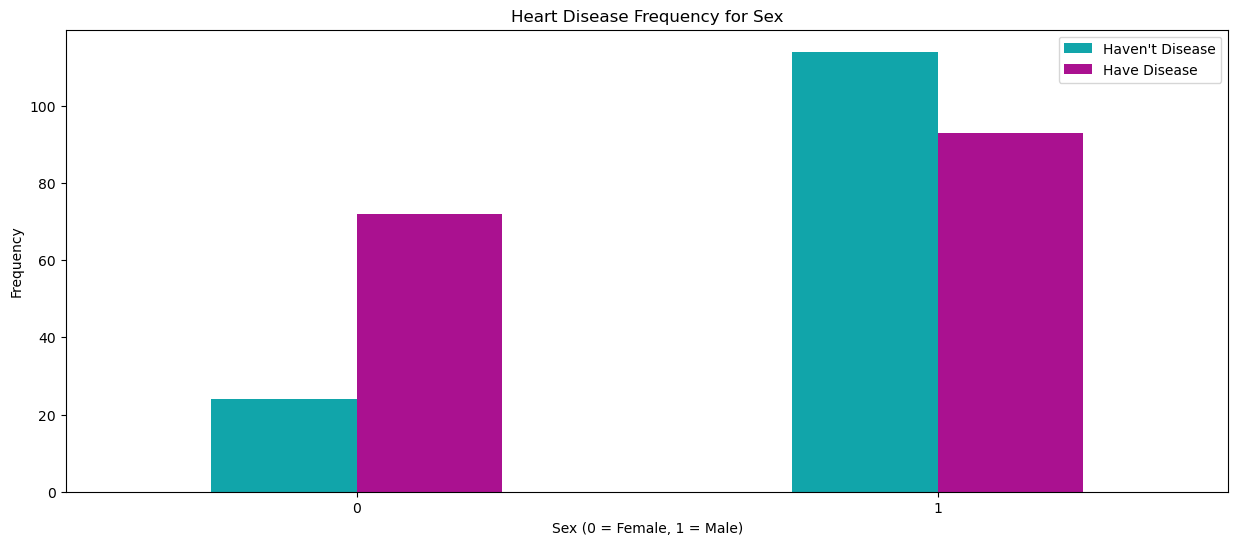

In [79]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

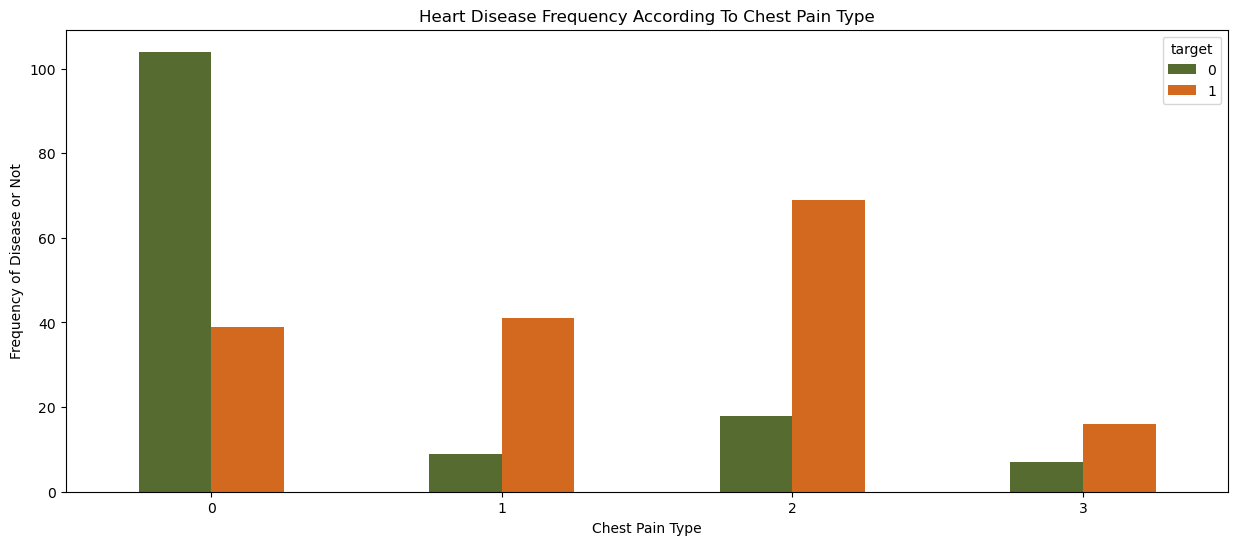

In [80]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#556b2f','#d2691e'])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

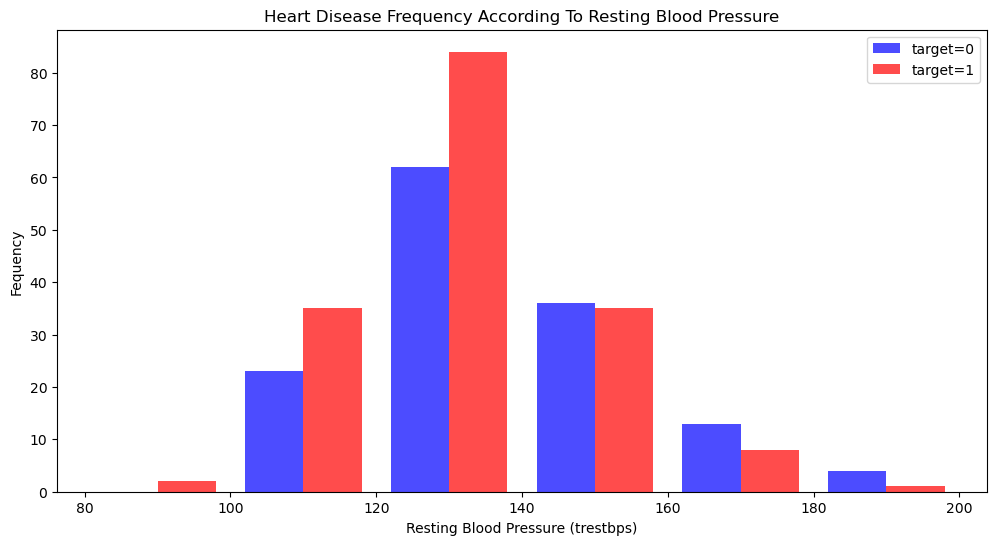

In [81]:
bins = np.arange(80, df['trestbps'].max() + 20, 20)

plt.figure(figsize=(12, 6))
plt.hist([df[df['target'] == 0]['trestbps'], df[df['target'] == 1]['trestbps']],
         bins=bins, label=['target=0', 'target=1'],
         color=['blue', 'red'], alpha=0.7)

plt.xlabel('Resting Blood Pressure (trestbps)')
plt.ylabel('Fequency')
plt.title('Heart Disease Frequency According To Resting Blood Pressure')
plt.xticks(bins)

plt.legend()
plt.show()

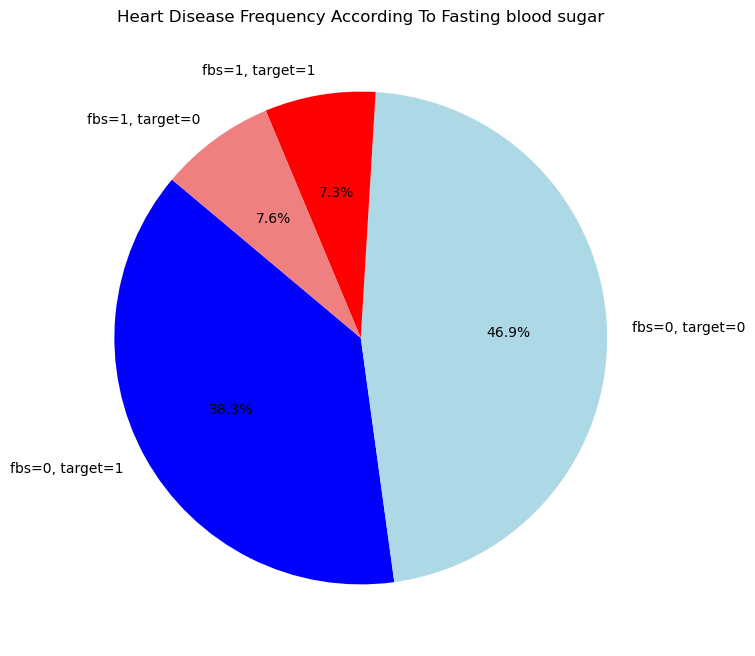

In [82]:
grouped = df.groupby(['fbs', 'target']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 8))
colors = ['blue', 'lightblue', 'red', 'lightcoral']
labels = ['fbs=0, target=1', 'fbs=0, target=0', 'fbs=1, target=1', 'fbs=1, target=0']
sizes = grouped.values.flatten()
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Heart Disease Frequency According To Fasting blood sugar')

plt.show()

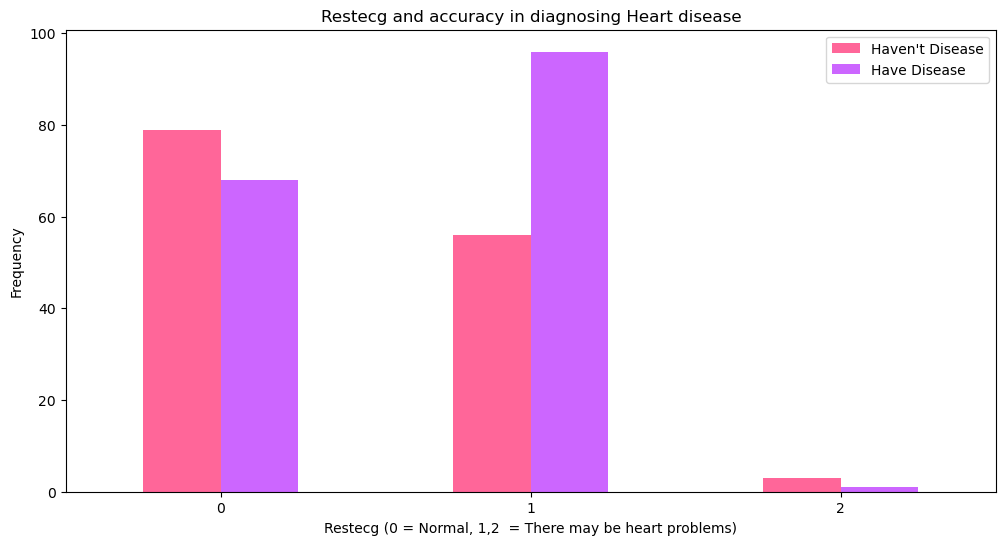

In [84]:
pd.crosstab(df.restecg,df.target).plot(kind="bar",figsize=(12,6),color=['#FF6699','#CC66FF'])
plt.title('Restecg and accuracy in diagnosing Heart disease')
plt.xlabel('Restecg (0 = Normal, 1,2  = There may be heart problems)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [85]:
df[['thalach','target']].head().sort_values(['thalach','target'], ascending = (True,True))


,thalach,target
0,150,1
4,163,1
2,172,1
3,178,1
1,187,1


In [86]:
thalach = df['thalach']

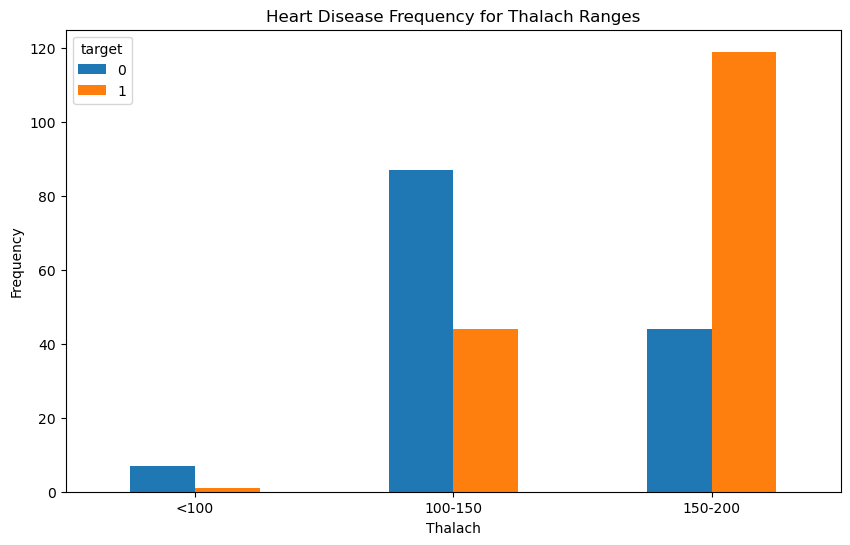

In [87]:
df['thalach_range'] = pd.cut(df['thalach'], bins=[0, 100, 150, 200], labels=['<100', '100-150', '150-200'])

summary = df.groupby('thalach_range')['target'].value_counts().unstack().fillna(0)

summary.plot(kind='bar', figsize=(10, 6))

plt.title('Heart Disease Frequency for Thalach Ranges')
plt.xlabel('Thalach')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

plt.show()

In [89]:
df[['slope','target']].head().sort_values(['slope','target'],ascending = (True,True))

,slope,target
0,0,1
1,0,1
2,2,1
3,2,1
4,2,1


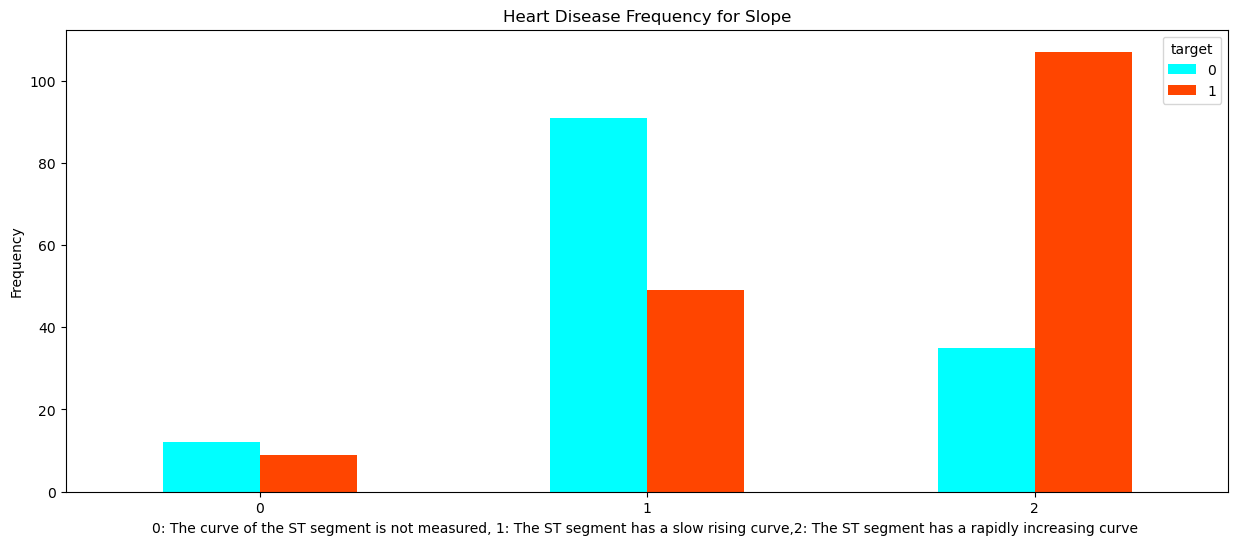

In [90]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#00ffff','#ff4500' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('0: The curve of the ST segment is not measured, 1: The ST segment has a slow rising curve,2: The ST segment has a rapidly increasing curve ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

In [91]:
df[['ca','target']].head().sort_values(['ca','target'],ascending = (True,True))

,ca,target
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


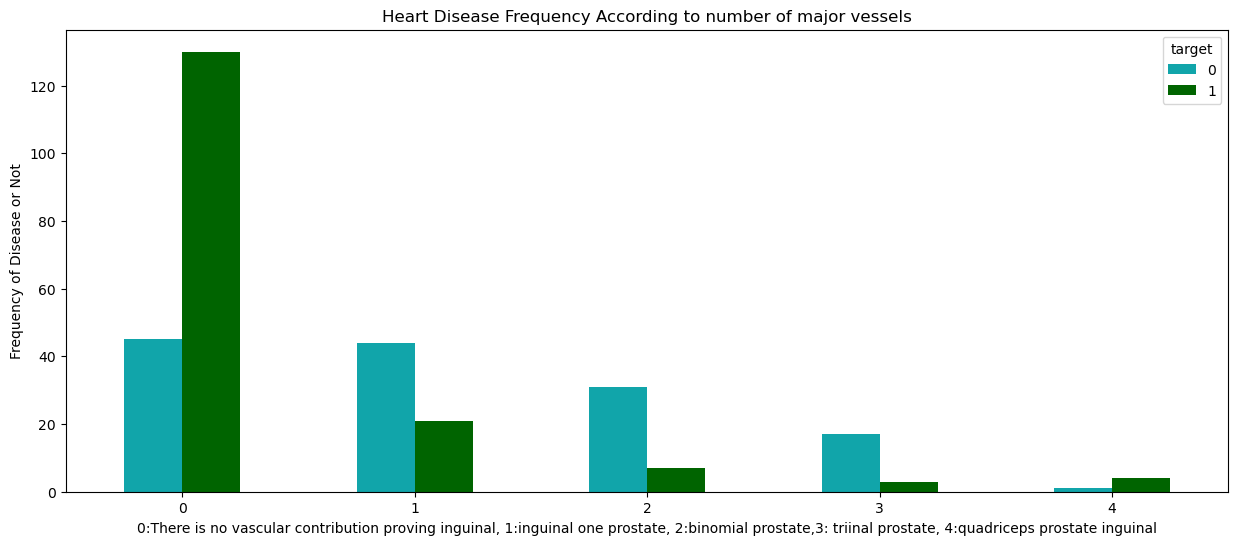

In [92]:
pd.crosstab(df.ca,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#006400' ])
plt.title('Heart Disease Frequency According to number of major vessels')
plt.xlabel("0:There is no vascular contribution proving inguinal, 1:inguinal one prostate, 2:binomial prostate,3: triinal prostate, 4:quadriceps prostate inguinal")
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

# K-Nearest Neighbors

In [93]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print("y_train has shape:",len(y_train))
print("y_test has shape:",len(y_test))
print("X_train has shape:",len(X_train))
print("X_test has shape:",len(X_test))

y_train has shape: 242
y_test has shape: 61
X_train has shape: 242
X_test has shape: 61


In [94]:
from sklearn import neighbors

k=1
model1_knn=neighbors.KNeighborsClassifier(n_neighbors=k)

model1_knn.fit(X_train,y_train)






KNeighborsClassifier(n_neighbors=1)

In [95]:
prediction = model1_knn.predict(X_test)

print("{} NN Score: {:.2f}%".format(2, model1_knn.score(X_test, y_test)*100))

2 NN Score: 52.46%


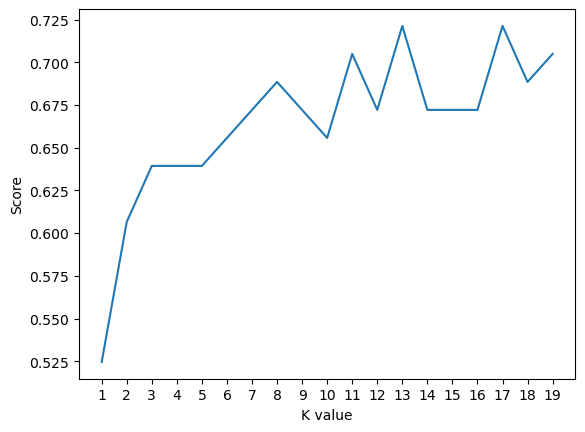

In [96]:
scoreList = []
for i in range(1,20):
    model2_knn = neighbors.KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    model2_knn.fit(X_train, y_train)
    scoreList.append(model2_knn.score(X_test, y_test))
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()



In [97]:
acc = max(scoreList)*100

print("Maximum KNN Score is {:.2f}%".format(acc))

Maximum KNN Score is 72.13%


# Logistic Regression

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

testperc=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testperc, random_state = 0)

scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)

logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [101]:
logreg.predict_proba(X_test)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([[9.99999973e-01, 2.74806164e-08],
       [9.99999824e-01, 1.76221997e-07],
       [1.00000000e+00, 6.92360756e-13],
       [1.00000000e+00, 3.15222177e-12],
       [9.99999971e-01, 2.92197960e-08],
       [9.99999056e-01, 9.43966846e-07],
       [9.99992359e-01, 7.64072165e-06],
       [1.00000000e+00, 2.12500797e-10],
       [1.00000000e+00, 7.99990454e-24],
       [1.00000000e+00, 5.99829619e-23],
       [4.14794421e-10, 1.00000000e+00],
       [9.99998644e-01, 1.35629667e-06],
       [1.00000000e+00, 1.15890941e-15],
       [9.99897220e-01, 1.02779737e-04],
       [7.98393610e-01, 2.01606390e-01],
       [9.99084686e-01, 9.15313615e-04],
       [9.99997330e-01, 2.66997585e-06],
       [9.80628422e-01, 1.93715785e-02],
       [1.00000000e+00, 4.06355562e-22],
       [1.46245507e-05, 9.99985375e-01],
       [7.97497045e-02, 9.20250295e-01],
       [9.99993264e-01, 6.73587816e-06],
       [1.00000000e+00, 9.78784883e-22],
       [1.00000000e+00, 1.95169454e-11],
       [9.968179

The value of AUC is 0.7995642701525054


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


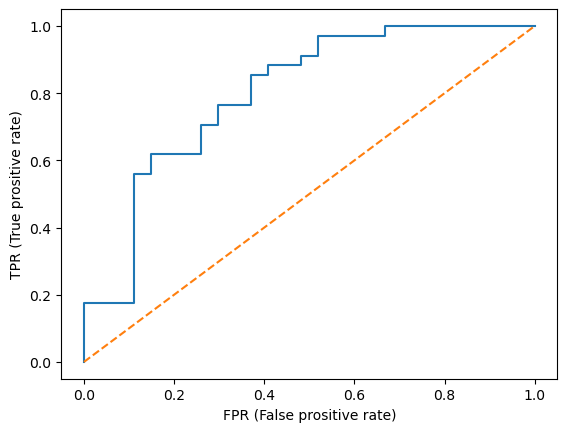

In [102]:
from sklearn.metrics import roc_curve, auc

y_scores = logreg.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

print("The value of AUC is",roc_auc)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')
plt.ylabel('TPR (True prositive rate)')
plt.xlabel('FPR (False prositive rate)')
plt.show()

In [103]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

X_test=scaler.transform(X_test)
y_test_pred=logreg.predict(X_test)
logreg.predict_proba(X_test)
acc=logreg.score(X_test,y_test)
cm= confusion_matrix(y_test, y_test_pred)

print("The accuracy is",acc*100,"%.")
print("The confustion matrix is... \n",cm)

The accuracy is 85.24590163934425 %.
The confustion matrix is... 
 [[21  6]
 [ 3 31]]


In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix



X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.2, random_state = 0) 
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)

logreg=LogisticRegression()
logreg.fit(X_train,y_train)

X_test=scaler.transform(X_test)
y_test_pred=logreg.predict(X_test)

logreg.predict_proba(X_test)
accuracy=logreg.score(X_test,y_test)
cm= confusion_matrix(y_test, y_test_pred)
print(cm)

[[21  6]
 [ 3 31]]
